<a href="https://colab.research.google.com/github/kimdyoc13/Machine_Learning_term_project_movie_regression/blob/main/%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D_%EC%88%98_%EC%98%88%EC%B8%A1_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOAL
- **영화 관객 수의 예측을 하는 회귀문제**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Project

## Data Preparation

### Env

In [ ]:
# Env
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [ ]:
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n



```
# 코드로 형식 지정됨
```

### 데이터 딕셔너리
| 변수명 | 정의	| 유형 | 설명 |
| :-: | :-: | :-: | :-: |
| title | 영화의 제목 | 명목형 |
| distributor | 배급사 | 명목형 |
| genre | 장르 | 명목형 |
| release_time | 개봉일 | 명목형 |
| time | 상영시간(분) | 연속형 |
| screerning_rat | 상영등급 | 명목형 |
| director | 감독이름 | 명목형 |
| dir_prev_bfum | 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단, 관객수가 알려지지 않은 영화 제외) | 연속형 | 0이면 첫 작품 |
| dir_prev_num | 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단, 관객수가 알려지지 않은 영화 제외) | 연속형 |
| num_staff | 스텝수 | 연속형 |
| num_actor | 주연배우수 | 연속형 |
| box_off_num | 관객수 | 연속형 | 타겟값 |

### Data Load

Link : <https://dacon.io/competitions/open/235536/overview/description>
![영화 관객수 예측](https://images.ctfassets.net/zkw0qlnf0vqv/psycom_page_fid42096_asset_26738/04630090c34d6123ef452d2f75b8491b/Concept_of_reserved_seats?fm=webp&fit=thumb&q=65&w=864&h=576)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터 마이닝/Term Project/영화 관객수 csv/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터 마이닝/Term Project/영화 관객수 csv/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터 마이닝/Term Project/영화 관객수 csv/submission.csv')

### 데이터 전처리

In [ ]:
train.shape, test.shape

((600, 12), (243, 11))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


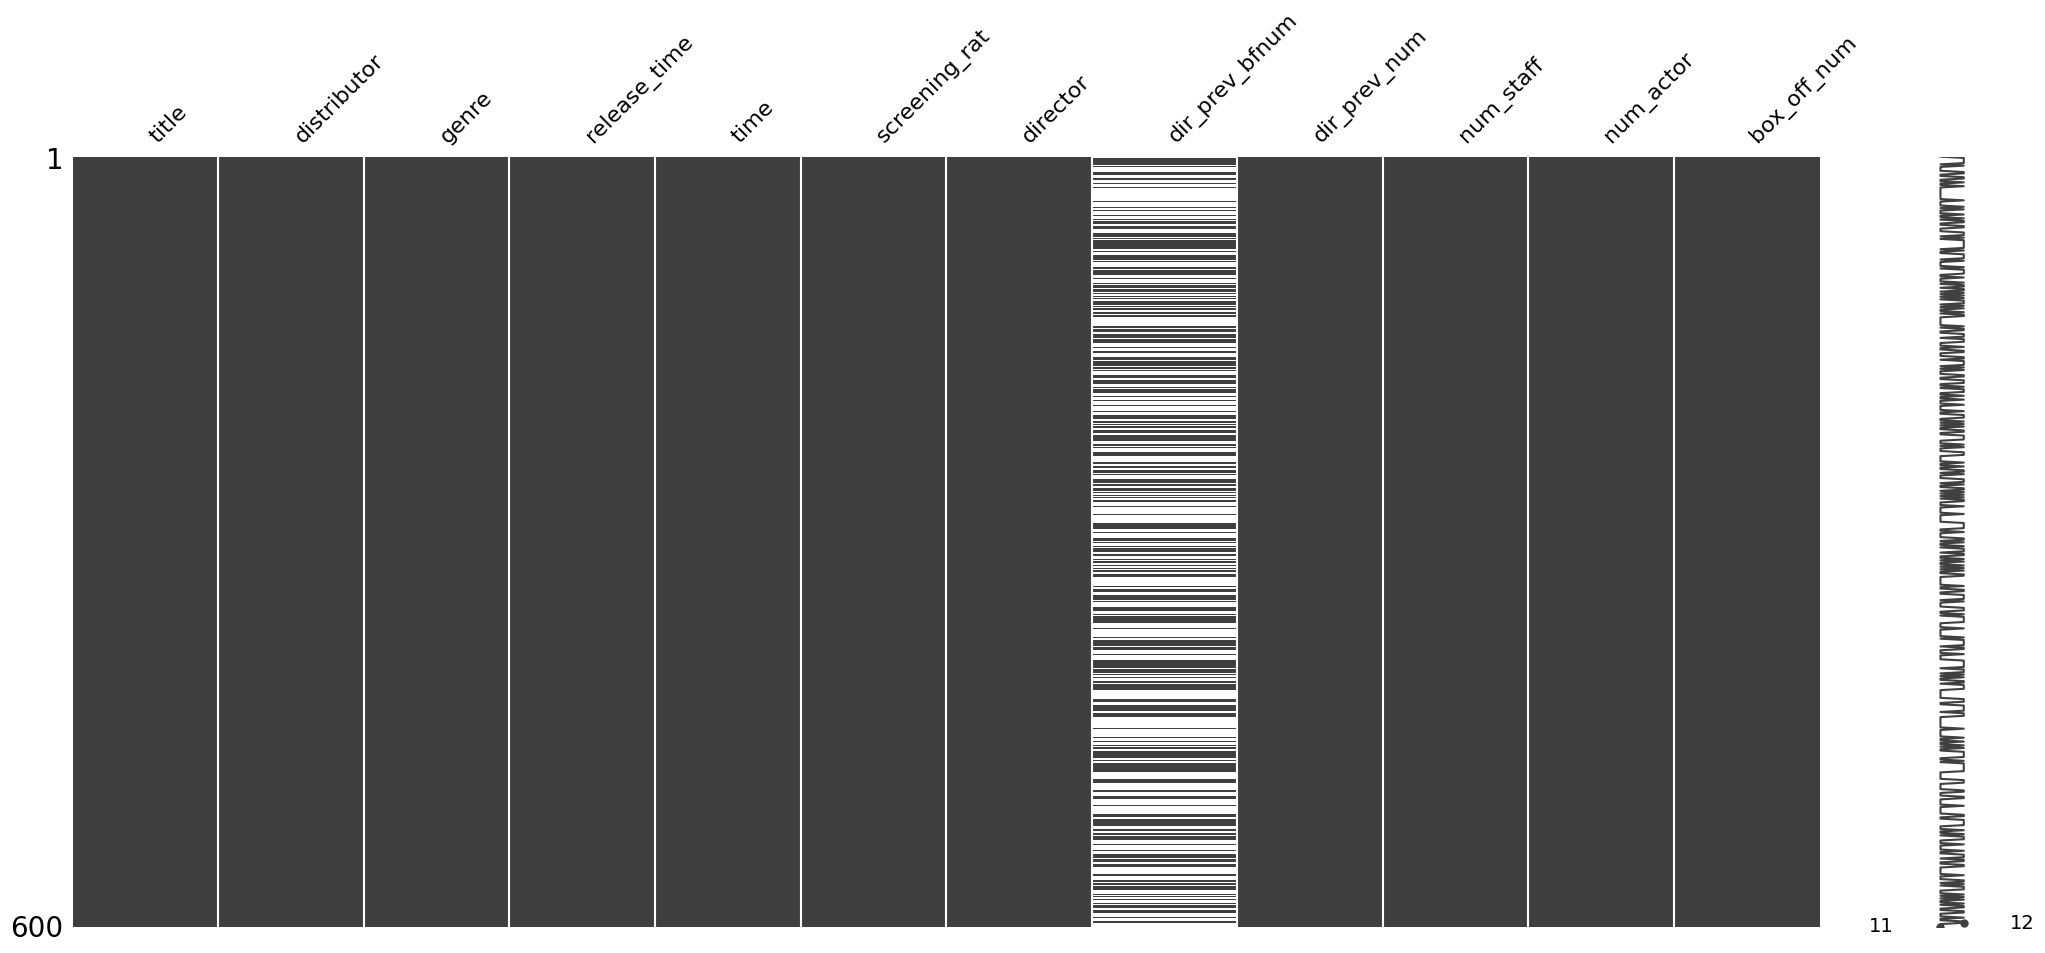

In [ ]:
import missingno as ms
ms.matrix(train)

plt.show()

In [ ]:
train.isna().sum() / len(train)

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace = True) # 0을 넣으면서 저장까지
train.isna().sum() # 0으로 채워졌는지 확인

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
test.isna().sum()
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.00,600.00,600.00,600.00,600.00,600.00
mean,100.86,472699.30,0.88,151.12,3.71,708181.75
std,18.10,1309474.31,1.18,165.65,2.45,1828005.85
min,45.00,0.00,0.00,0.00,0.00,1.00
25%,89.00,0.00,0.00,17.00,2.00,1297.25
50%,100.00,0.00,0.00,82.50,3.00,12591.00
75%,114.00,376141.62,2.00,264.00,4.00,479886.75
max,180.00,17615314.00,5.00,869.00,25.00,14262766.00


In [ ]:
display(train.head())
display(test.head())

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.67,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.00,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.00,1,380,1


In [ ]:
# 불필요 칼럼 삭제
train = train.drop(columns=['title','director'])
test = test.drop(columns=['title','director'])

In [ ]:
# 배급사 상위 5개 제외 모두 기타로 처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
  if distributor in distributor_list:
    return distributor
  else:
    return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distirbutor'] = test['distributor'].apply(lambda x : func(x))

## EDA

### 분포확인 시각화




<ipython-input-21-4720b0fb7052>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),vmin=-1, vmax=1, annot = True)


<Axes: >

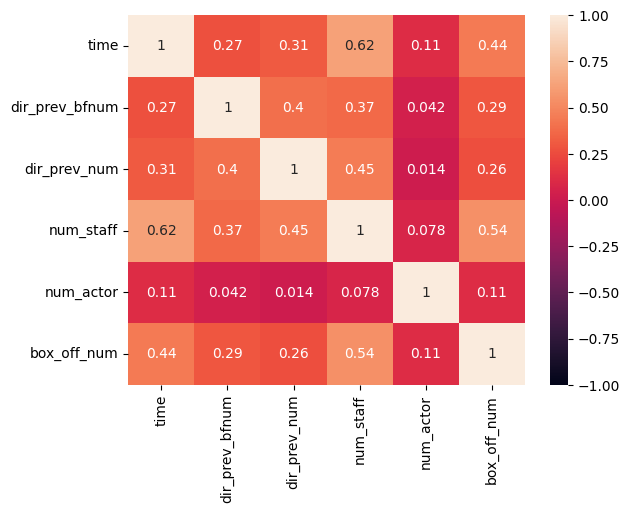

In [ ]:
sns.heatmap(train.corr(),vmin=-1, vmax=1, annot = True)

<Figure size 640x480 with 0 Axes>

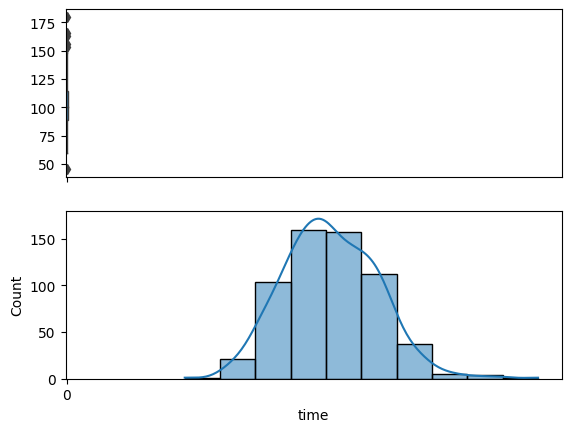

<Figure size 640x480 with 0 Axes>

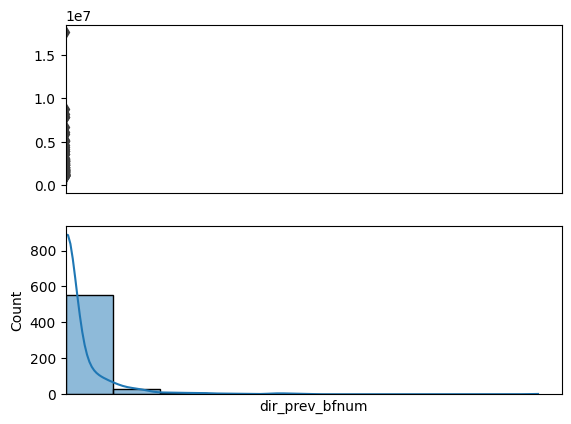

<Figure size 640x480 with 0 Axes>

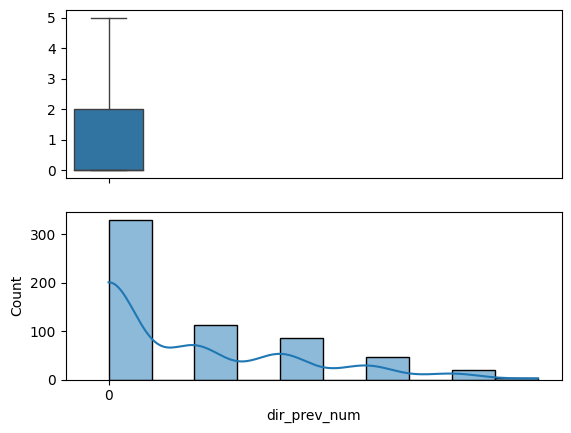

<Figure size 640x480 with 0 Axes>

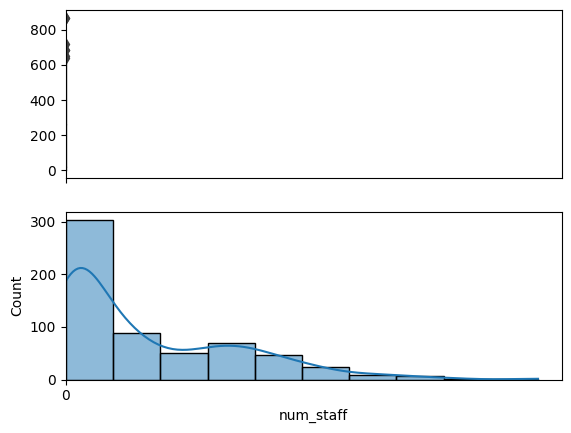

<Figure size 640x480 with 0 Axes>

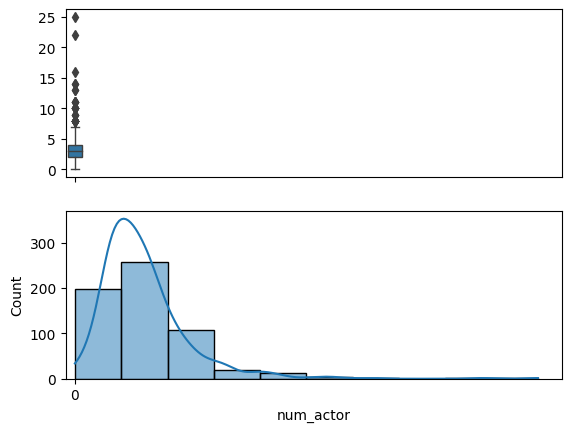

<Figure size 640x480 with 0 Axes>

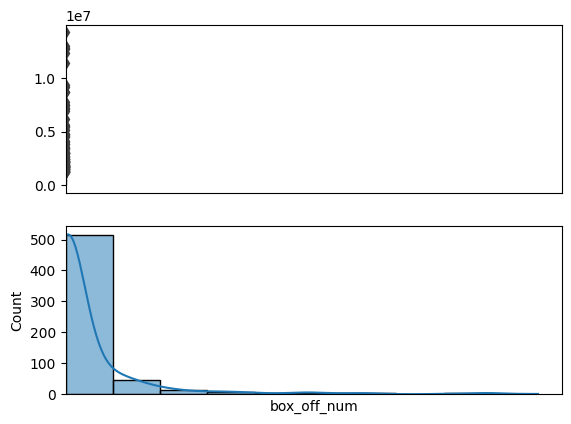

In [ ]:
features = train.columns
numeric_features = train.select_dtypes('number').columns
categorical_features = train.select_dtypes('object').columns
for i in numeric_features:
  plt.figure()
  plt.tight_layout()
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
  sns.boxplot(train[i], ax=ax_box , linewidth= 1.0)
  sns.histplot(train[i], ax=ax_hist , bins = 10,kde=True)

#### **1.장르**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53328 (\N{HANGUL SYLLABLE KYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

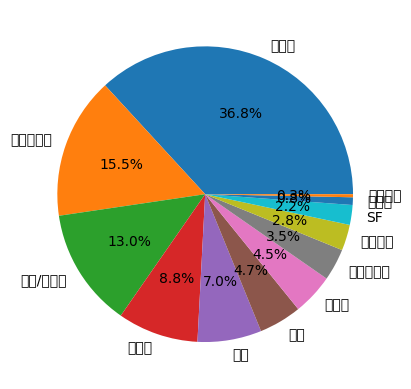

In [ ]:
Value = train.genre.value_counts().values
label = train.genre.value_counts().index

plt.pie(Value, labels = label, autopct = '%.1f%%')
plt.show()

- 장르별 전체 영화관객

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').sum().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,33135
서스펜스,165222
애니메이션,3820460
다큐멘터리,6247020
미스터리,8968319
SF,23248494
공포,24814966
멜로/로맨스,33225507
느와르,61119768


- 장르별 평균 영화관객

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.00
다큐멘터리,67172.26
서스펜스,82611.00
애니메이션,181926.67
멜로/로맨스,425968.04
미스터리,527548.18
공포,590832.52
드라마,625689.79
코미디,1193914.00


- 개봉날짜별 장르별 관객수

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

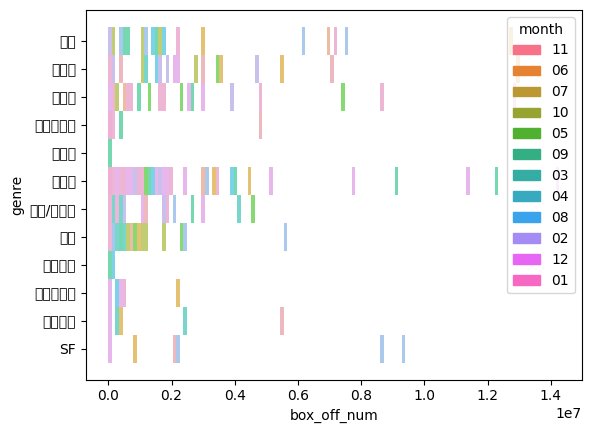

In [ ]:
train['year'] = train['release_time'].str.slice(0, 4)
train['month'] = train['release_time'].str.slice(5, 7)
f = sns.histplot(x = 'box_off_num', y = 'genre', hue = 'month', data = train)
plt.show()

- 상영등급별 장르별 관객수

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

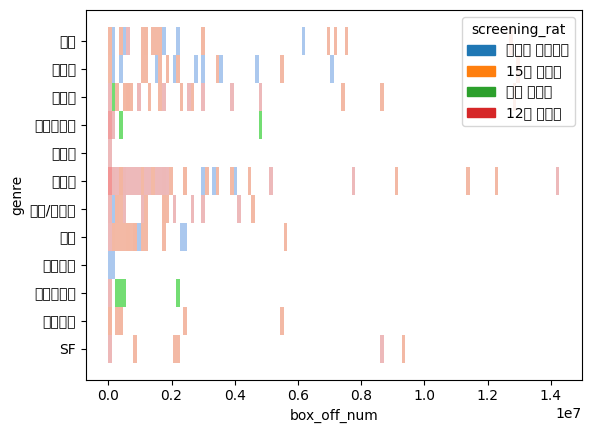

In [ ]:
f = sns.histplot(x = 'box_off_num', y = 'genre', hue = 'screening_rat', data = train)
plt.show()

- 배급사별 장르별 관객수

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

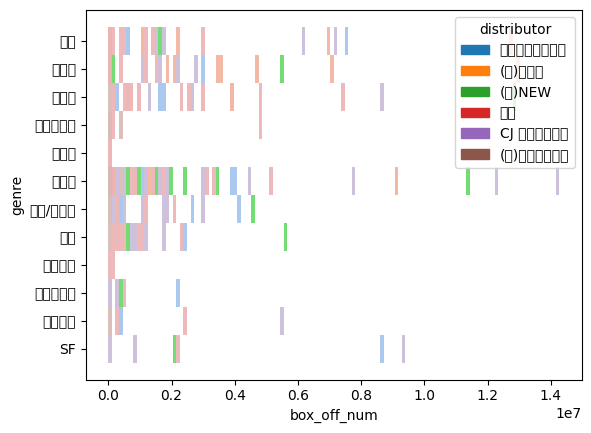

In [ ]:
f = sns.histplot(x = 'box_off_num', y = 'genre', hue = 'distributor', data = train)
plt.show()

- 상영시간별 장르별 관객수

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*ar

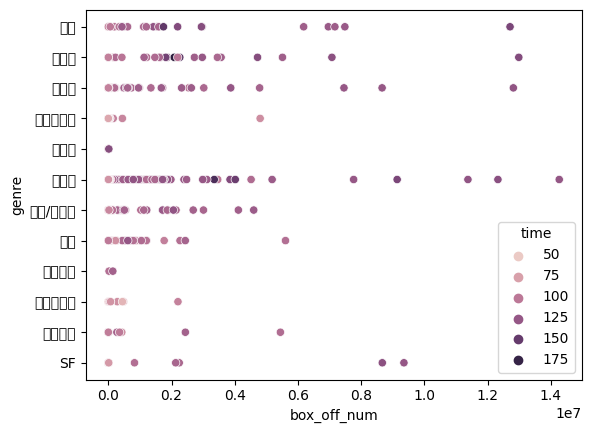

In [ ]:
f = sns.scatterplot(x = 'box_off_num', y = 'genre', hue = 'time', data = train)

- 스텝수별 장르별 관객수

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*ar

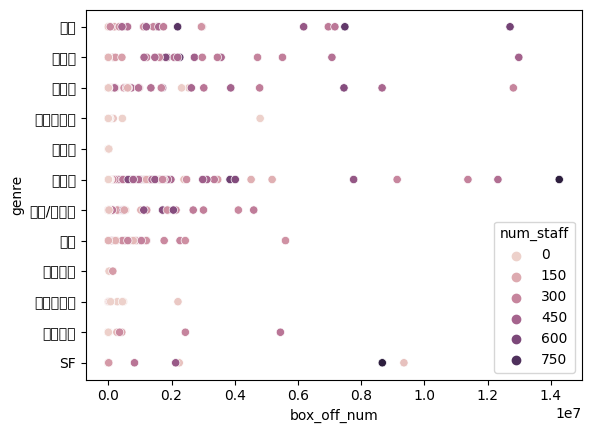

In [ ]:
f = sns.scatterplot(x = 'box_off_num', y = 'genre', hue = 'num_staff', data = train)

#### **2.개봉 날짜**

In [ ]:
year = train['release_time'].str.slice(0, 4)
month = train['release_time'].str.slice(5, 7)

- 개봉년도별 시각화

<Axes: >

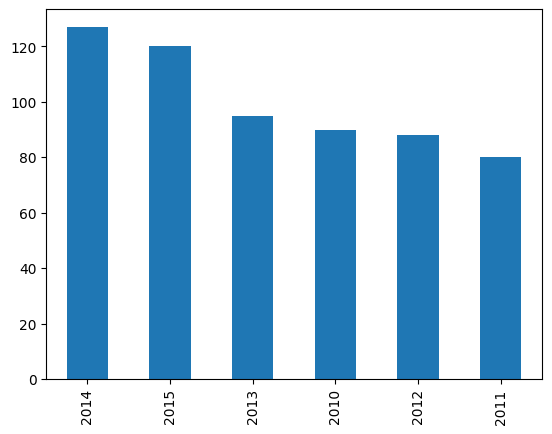

In [ ]:
year.value_counts().plot.bar()

- 개봉월별 시각화

<Axes: >

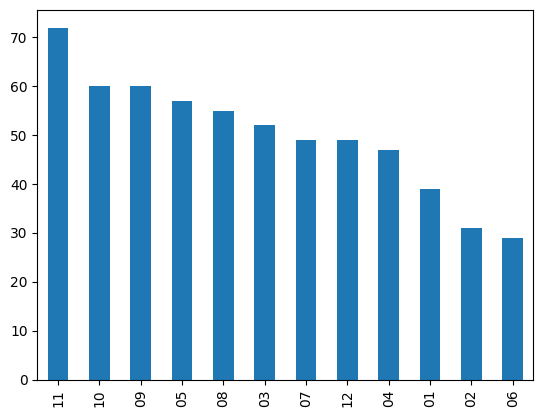

In [ ]:
month.value_counts().plot.bar()

#### **3.상영등급**

- 상영등급별 영화의 갯수

In [ ]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

- 상영등급에 따른 관객수 시각화

<Axes: xlabel='screening_rat', ylabel='box_off_num'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  func

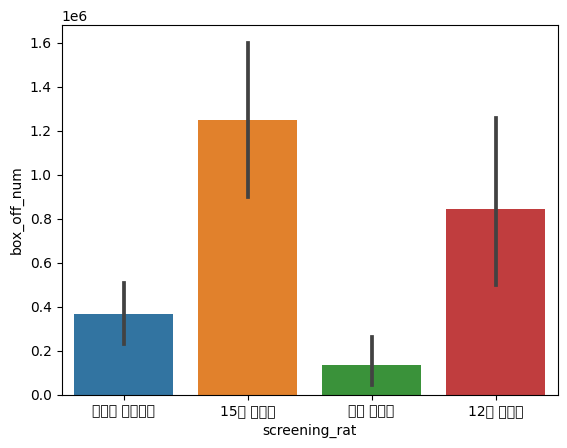

In [ ]:
sns.barplot(x = 'screening_rat', y = 'box_off_num', data = train)

#### **4.배급사**

- 배급사별 영화의 갯수

In [ ]:
train['distributor'].value_counts()

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

- 배급사에 따른 관객수 시각화

<Axes: xlabel='distributor', ylabel='box_off_num'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, 

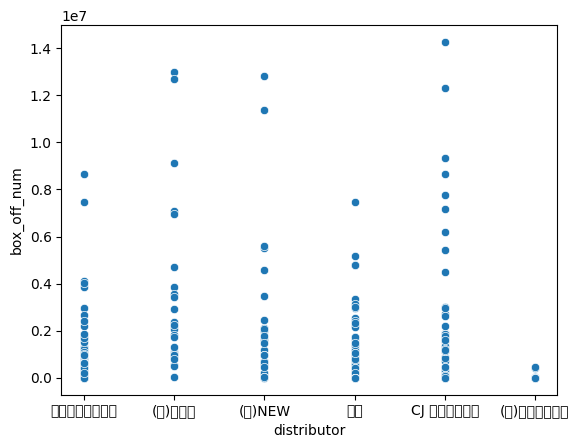

In [ ]:
sns.scatterplot(x = 'distributor', y = 'box_off_num', data = train)

- 연휴와 휴가철에 맞춰 배급사들은 관객을 모으기 위해 그 시기에 개봉하는 영화가 많다.<br> $H_0 : \mu 대목 = \mu 비대목$ <br>  $H_1 : \mu 대목 > \mu 비대목$   
<br>
- 그래서 가족단위로 볼 수 있는 15세 영화거나 드라마 장르인 영화가 많다.<br>
$H_0 : \mu 15세 = \mu 15세 제외등급$ <br>  $H_1 : \mu 15세 > \mu 15세 제외등급$ <br><br>
$H_0 : \mu 장르 = \mu 장르 제외$ <br>  $H_1 : \mu 장르 > \mu 장르 제외$    
<br>
- 또한 관객을 끌어들이기 위해 대형 배급사가 많은 비율을 차지한다. <br>
$H_0 : \mu 대형 배급사 = \mu 중소 배급사$ <br>  $H_1 : \mu 대형 배급사 > \mu 중소 배급사$  
<br> Link1 : <https://www.yna.co.kr/view/AKR20161028131500005> <br>
Link2 : <https://news.kbs.co.kr/news/view.do?ncd=3241508> <br>
Link3 : <https://www.ksdaily.co.kr/news/articleView.html?idxno=89596>

#### **5.상영시간**

- 상영시간에 따른 관객수 시각화

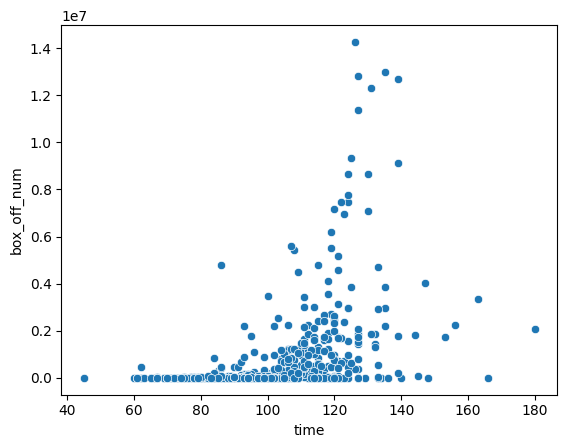

In [ ]:
f = sns.scatterplot(x = 'time', y = 'box_off_num', data = train)
plt.show()

<Axes: xlabel='time'>

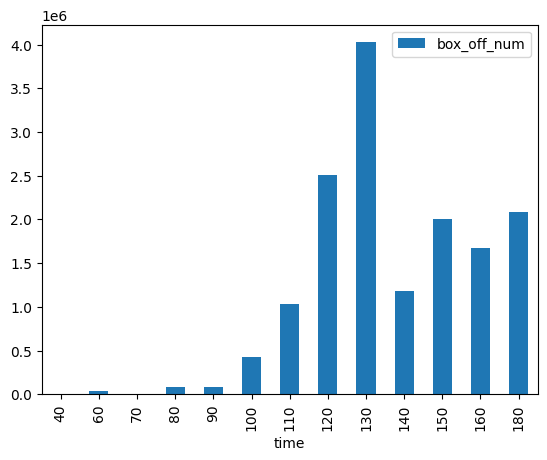

In [ ]:
def time_categorize(time):
  time = (time // 10) * 10
  return time
train['time'] = train['time'].apply(time_categorize)

train[['time', 'box_off_num']].groupby('time').mean().sort_values('time').plot.bar()

Link4 : <https://www.chosun.com/site/data/html_dir/2015/02/22/2015022202599.html>

#### **6.스텝 수**

- 스텝 수에 따른 관객수 시각화

<Axes: xlabel='num_staff', ylabel='box_off_num'>

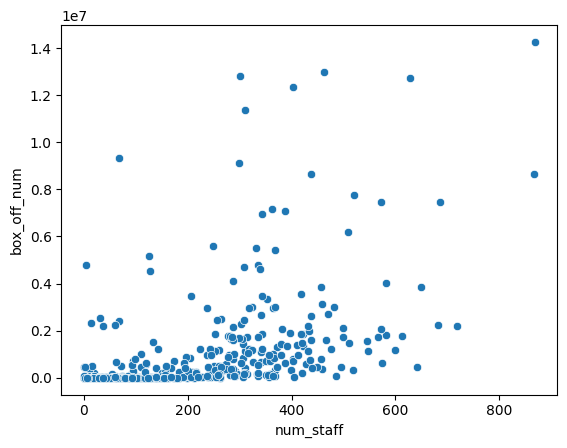

In [ ]:
sns.scatterplot(x = 'num_staff', y = 'box_off_num', data = train)

Link5 : <https://m.blog.naver.com/cine_play/221120690635>

## Machine Learning (ML)

In [ ]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [ ]:
train['screening_rat'] = train['screening_rat'].map({'청소년 관람불가':0, '15세 관람가':1, '12세 관람가':2, '전체 관람가':3})
test['screening_rat'] = test['screening_rat'].map({'청소년 관람불가':0, '15세 관람가':1, '12세 관람가':2, '전체 관람가':3})

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
X = train[['time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
y = np.log1p(train.box_off_num)

In [ ]:
X = pd.get_dummies(columns = ['screening_rat'], data = X)
X['num_actor'] = np.log1p(X['num_actor'])

In [ ]:
target = test[['time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
target = pd.get_dummies(columns = ['screening_rat'], data = target)
target['num_actor'] = np.log1p(target['num_actor'])

In [ ]:
kf = KFold(n_splits =  5, shuffle = True, random_state = 42)

In [ ]:
def get_result(y_trn, y_pred):
  mse = mean_squared_error(y_trn, y_pred)
  rmse = np.sqrt(mse)

  print('MSE: %.2f, \nRMSE: %.2f' % (mse, rmse))
  result = pd.DataFrame({'Actual': y_trn.values.reshape(-1), 'Predicted': y_pred.reshape(-1)})
  sns.regplot(x='Actual', y='Predicted', data=result)
  plt.plot(np.arange(np.ceil(result.max().max())), np.arange(np.ceil(result.max().max())), 'r')
  plt.show()


### GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(random_state = 42)

In [ ]:
rmse_list = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]

    gb.fit(tr_x, tr_y)

    pred = np.expm1([0 if x < 0 else x for x in gb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))

    rmse_list.append(rmse)

    gb_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

915003.2155186186

MSE: 2.22, 
RMSE: 1.49


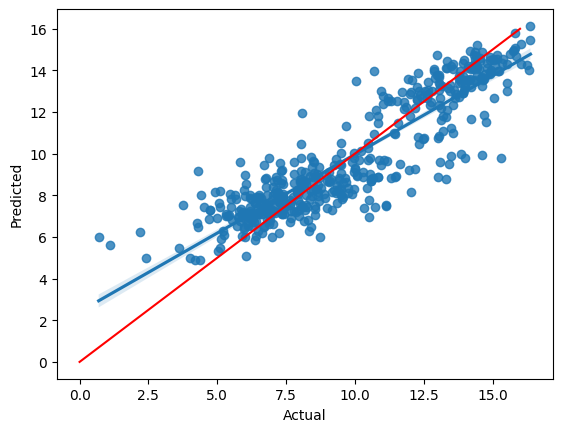

None

MSE: 3.25, 
RMSE: 1.80


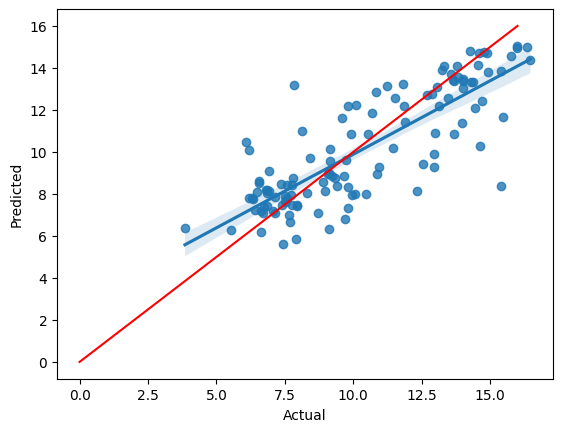

None

In [ ]:
y_trn_pred = gb.predict(tr_x)
display(get_result(tr_y, y_trn_pred))

y_tst_pred =gb.predict(val_x)
display(get_result(val_y, y_tst_pred))

### LGBMRegressor

In [ ]:
lgbm = LGBMRegressor(random_state =42)

In [ ]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]

    lgbm.fit(tr_x, tr_y)

    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))

    rmse_list.append(rmse)

    lgb_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

1024343.0027581446

MSE: 1.79, 
RMSE: 1.34


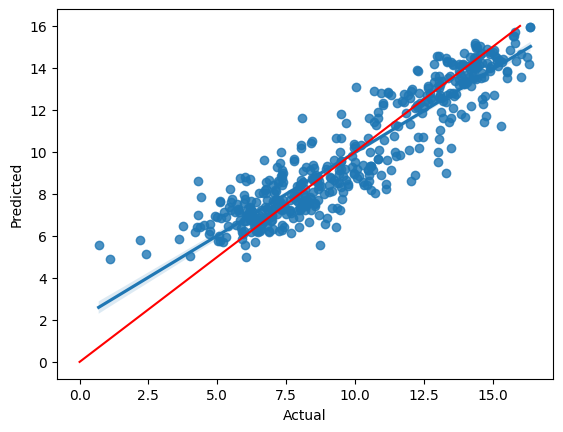

None

MSE: 3.27, 
RMSE: 1.81


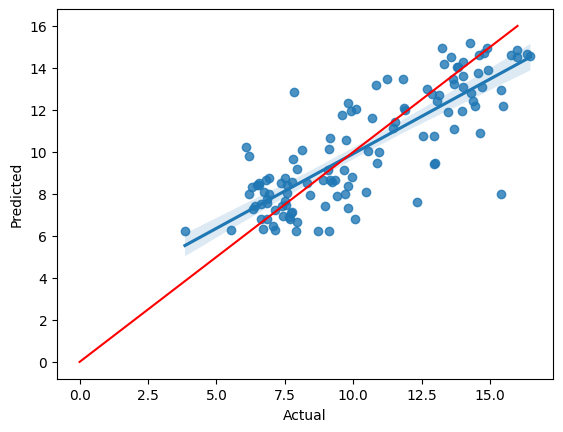

None

In [ ]:
y_trn_pred = lgbm.predict(tr_x)
display(get_result(tr_y, y_trn_pred))

y_tst_pred =lgbm.predict(val_x)
display(get_result(val_y, y_tst_pred))

### RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]

    rf.fit(tr_x, tr_y)

    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))

    rmse_list.append(rmse)

    rf_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

846710.0474038839

MSE: 0.72, 
RMSE: 0.85


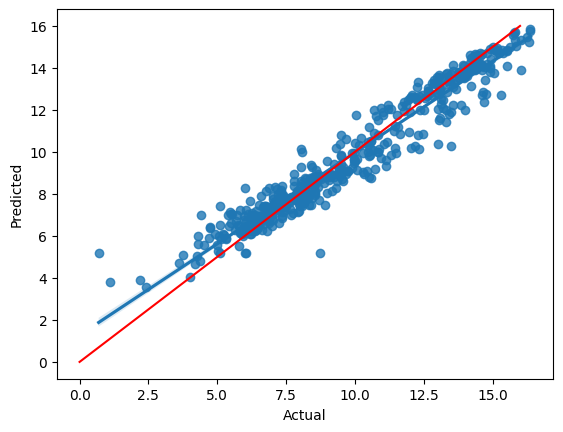

None

MSE: 3.27, 
RMSE: 1.81


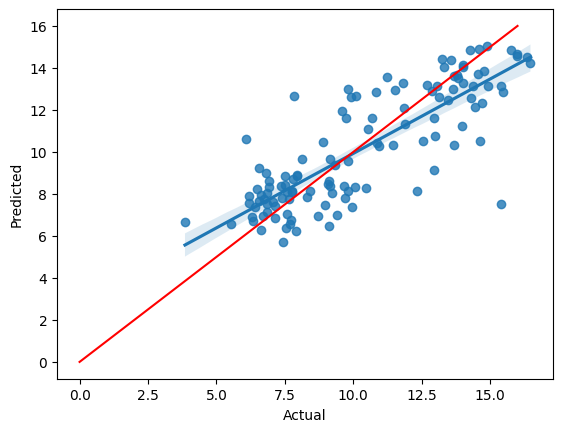

None

In [ ]:
y_trn_pred = rf.predict(tr_x)
display(get_result(tr_y, y_trn_pred))

y_tst_pred =rf.predict(val_x)
display(get_result(val_y, y_tst_pred))

#### 회귀계수 검정

In [ ]:
import statsmodels.api as sm
tr_x

,time,num_staff,num_actor,genre_rank,screening_rat_0,screening_rat_1,screening_rat_2,screening_rat_3
0,90,91,1.10,11,1,0,0,0
2,120,343,1.61,11,0,1,0,0
3,100,20,1.95,9,0,0,0,1
4,100,251,1.10,9,0,1,0,0
5,110,262,1.61,9,0,1,0,0
...,...,...,...,...,...,...,...,...
593,90,5,1.39,6,1,0,0,0
595,110,510,2.08,8,1,0,0,0
596,120,286,1.95,8,0,1,0,0
598,100,431,1.61,12,0,1,0,0


In [ ]:
model = sm.OLS(tr_y.values.reshape(-1, 1), sm.add_constant(tr_x.values)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     105.0
Date:                Wed, 31 May 2023   Prob (F-statistic):           4.62e-92
Time:                        09:46:36   Log-Likelihood:                -1035.4
No. Observations:                 480   AIC:                             2087.
Df Residuals:                     472   BIC:                             2120.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9405      0.530      5.551      0.0

- 위의 결과표를 보았을 때 유의수준 0.05에서 **num_actor**, **genre_rank**, **screening_rat_0**은 영향을 미치지않는다.

#### 예측 결과

In [ ]:
submission['box_off_num'] = (gb_pred + lgb_pred + rf_pred) / 3

In [ ]:
submission.sort_values(by = 'box_off_num')

,title,box_off_num
188,정사: 위험한 성적유희,90.62
72,잔혹한 앵글의 로망스,113.68
238,해에게서 소년에게,182.55
133,롤플레이 2 : 동침,200.25
86,하나안,276.42
...,...,...
142,박수건달,1804523.83
184,기술자들,1825427.18
15,포화 속으로,2143119.46
179,군도: 민란의 시대,2203755.84
